## Project 4
##### Nicole Tran, Azwa Bajwah, and Evelyn Zhao
### Predicting IBM Closing Stock Value

### Imports

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Alpha Vantage API Data Retrieval

Nicole's key: SM128O7TM7IKTSGT

In [32]:
#get data from api
key = "SM128O7TM7IKTSGT"
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={key}'
r = requests.get(url)
data = r.json()
print(data)
data = data['Time Series (Daily)']

#put into a pd df
df = pd.DataFrame(data).T
df.reset_index(inplace=True)
col_names = ["date","open","high","low","close","volume"]
df.columns = col_names
df.date = pd.to_datetime(df.date)

#grab only from 2023-11-07 to 2024-03-26
inbetween = df.date.between(pd.to_datetime("2023-11-07"), pd.to_datetime("2024-03-26"))
ibm_daily = df[inbetween]
ibm_daily



{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


KeyError: 'Time Series (Daily)'

In [44]:
SAVED_DATA = ibm_daily.copy(deep=True)
#SAVED_DATA.to_csv('ibm_daily.csv', index=False)  

print(ibm_daily.head())

#split into test and train
test = ibm_daily[:5]
train = ibm_daily[5:]

         date      open      high       low     close   volume
21 2024-03-26  189.0200  190.0000  188.5000  188.5000  4229535
22 2024-03-25  190.2600  190.8200  188.7500  188.7900  3718289
23 2024-03-22  192.0000  192.9850  190.5100  190.8400  3988398
24 2024-03-21  193.0000  193.3700  190.0100  191.9000  6013561
25 2024-03-20  192.8700  193.9800  191.3100  193.9600  3238643


### Visualize Data

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_92347/4008655496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_daily[["open","high","low","close","volume"]] = ibm_daily[["open","high","low","close","volume"]].astype(float)


<Figure size 640x480 with 0 Axes>

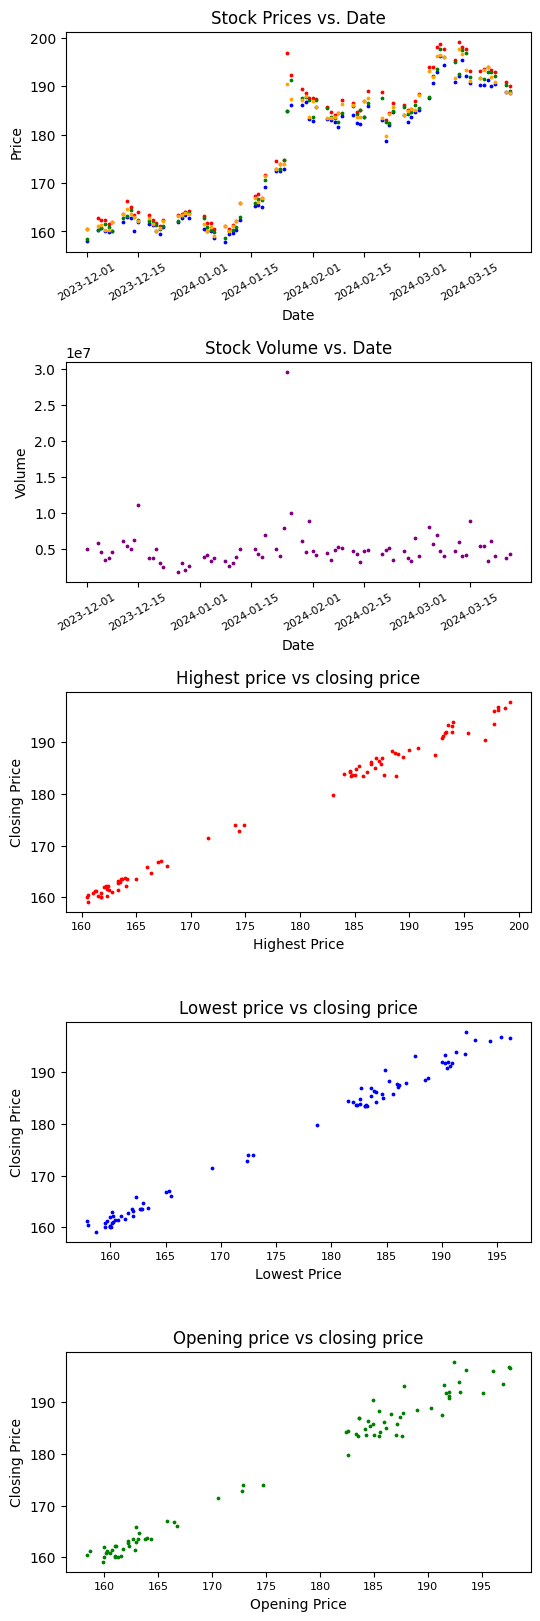

In [104]:
#data viz (use subplot)

#listing column names
print(ibm_daily.columns)
ibm_daily[["open","high","low","close","volume"]] = ibm_daily[["open","high","low","close","volume"]].astype(float)
plt.tight_layout()
fig, axs = plt.subplots(5, figsize=(6, 20))
plt.rc('xtick', labelsize=8)
#plt.xticks(rotation=45)


#plotting all cols against date (ind)
axs[0].scatter(ibm_daily.date, ibm_daily.high, color='red', s=3)
axs[0].scatter(ibm_daily.date, ibm_daily.low, color='blue', s=3)
axs[0].scatter(ibm_daily.date, ibm_daily.open, color='green', s=3)
axs[0].scatter(ibm_daily.date, ibm_daily.close, color='orange', s=3)
axs[0].set_title('Stock Prices vs. Date')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].tick_params(axis='x', rotation=30) # Rotate x-axis tick marks for the dates


#plotting volume against date (ind)
axs[1].scatter(ibm_daily.date, ibm_daily.volume, color='purple', s=3)
axs[1].set_title('Stock Volume vs. Date')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].tick_params(axis='x', rotation=30) # Rotate x-axis tick marks for the dates

#plotting highest price (ind) vs closing price (dep)
axs[2].scatter(ibm_daily.high, ibm_daily.close, color='red', s=3)
axs[2].set_title('Highest price vs closing price')
axs[2].set_xlabel('Highest Price')
axs[2].set_ylabel('Closing Price')

#plotting lowest price (ind) vs closing price (dep)
axs[3].scatter(ibm_daily.low, ibm_daily.close, color='blue', s=3)
axs[3].set_title('Lowest price vs closing price')
axs[3].set_xlabel('Lowest Price')
axs[3].set_ylabel('Closing Price')

#plotting opening price (ind) vs closing price (dep)
axs[4].scatter(ibm_daily.open, ibm_daily.close, color='green', s=3)
axs[4].set_title('Opening price vs closing price')
axs[4].set_xlabel('Opening Price')
axs[4].set_ylabel('Closing Price')

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show()

### Conjectures about what to expect

Now that we’ve visualized our data, let's make a few conjectures about what to expect from our linear regression model.
For each of the variable relationships you graphed above, which of them display a linear relationship? Which do not? Why or why not? 

### Multivariate Linear Regression model

In [ ]:
#mlr model

### Add Regularization with RidgeRegression

The use of regularizing is ... (one sentence here)

In [ ]:
#regularizing

### Calculating Mean Standard Error

Calculate the MSE for the new RidgeRegression model across the 5 days, and compare it to the MSE when using the LinearRegression model without the regularization. Give an explanation for why the two values might potentially be different.

### Pros and Cons

Now that we have our model, we can accurately predict every IBM closing day stock value- right? Give a brief explanation as to the pros and cons of using this approach in the real world, and whether it would have practical value. Also, describe briefly how you picked the coefficient for the L2-norm in ridge regression.